In [40]:
import pandas as pd

df = pd.read_csv('..\Diamond_Rings_data\processed_diamond_ring_data.csv',index_col=0, header=0)
df.head()

Ring Price  Ring Gross Weight  Ring Size  Diamond Weight/Carats  \
0   4000000.0               5.10        6.0                   3.45   
1   4000000.0               6.90        6.0                   5.01   
2   4000000.0               4.47        4.0                   6.40   
3   4000000.0               5.51        6.0                   7.15   
4   4000000.0               5.90        6.0                   5.04   

   Diamond Count  
0           25.0  
1           50.0  
2           25.0  
3           25.0  
4           25.0

In [41]:
df.isnull().sum()

Ring Price                 0
Ring Gross Weight         41
Ring Size                190
Diamond Weight/Carats    145
Diamond Count            105
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1444
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ring Price             1445 non-null   float64
 1   Ring Gross Weight      1404 non-null   float64
 2   Ring Size              1255 non-null   float64
 3   Diamond Weight/Carats  1300 non-null   float64
 4   Diamond Count          1340 non-null   float64
dtypes: float64(5)
memory usage: 67.7 KB


In [30]:
df.describe()

Ring Price  Ring Gross Weight    Ring Size  Diamond Weight/Carats  \
count  1.445000e+03        1404.000000  1255.000000            1300.000000   
mean   1.732477e+06          11.269167     6.173705               6.572568   
std    6.251030e+05           7.993265     1.418755               7.821933   
min    1.000000e+03           2.200000     3.000000               0.190000   
25%    1.375000e+06           6.300000     5.000000               2.530000   
50%    1.673000e+06           8.900000     6.000000               3.780000   
75%    1.912000e+06          13.750000     7.000000               7.000000   
max    4.000000e+06          59.900000    13.000000              90.000000   

       Diamond Count  
count    1340.000000  
mean       42.388060  
std        26.013557  
min        25.000000  
25%        25.000000  
50%        25.000000  
75%        50.000000  
max       100.000000

<AxesSubplot:>

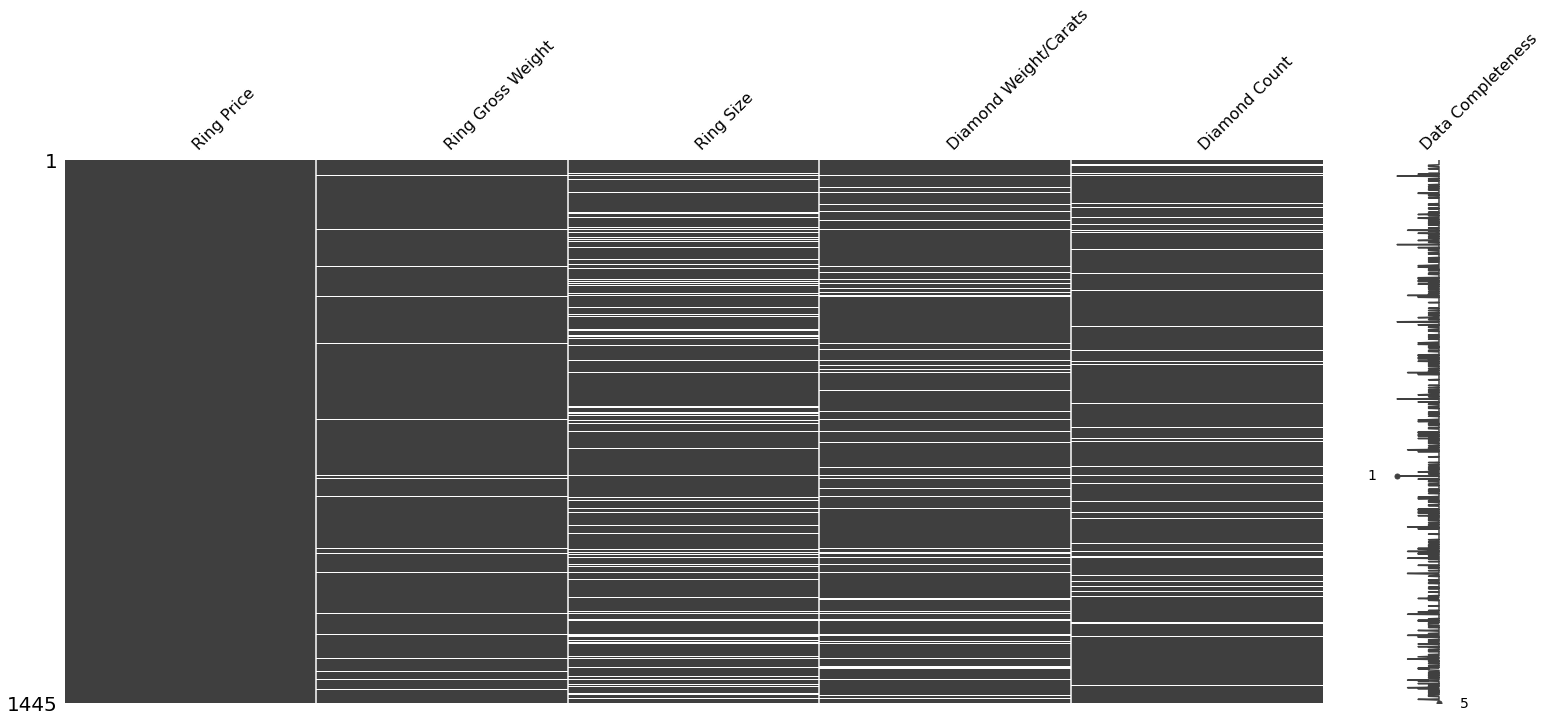

In [31]:
import missingno as msno
msno.matrix(df, labels=True)

In [5]:
df1 = df.dropna(subset=["Ring Gross Weight","Diamond Weight/Carats","Diamond Count","Ring Size"])

In [117]:
df1 = df1.drop(['Unnamed: 0'], axis=1)

<AxesSubplot:>

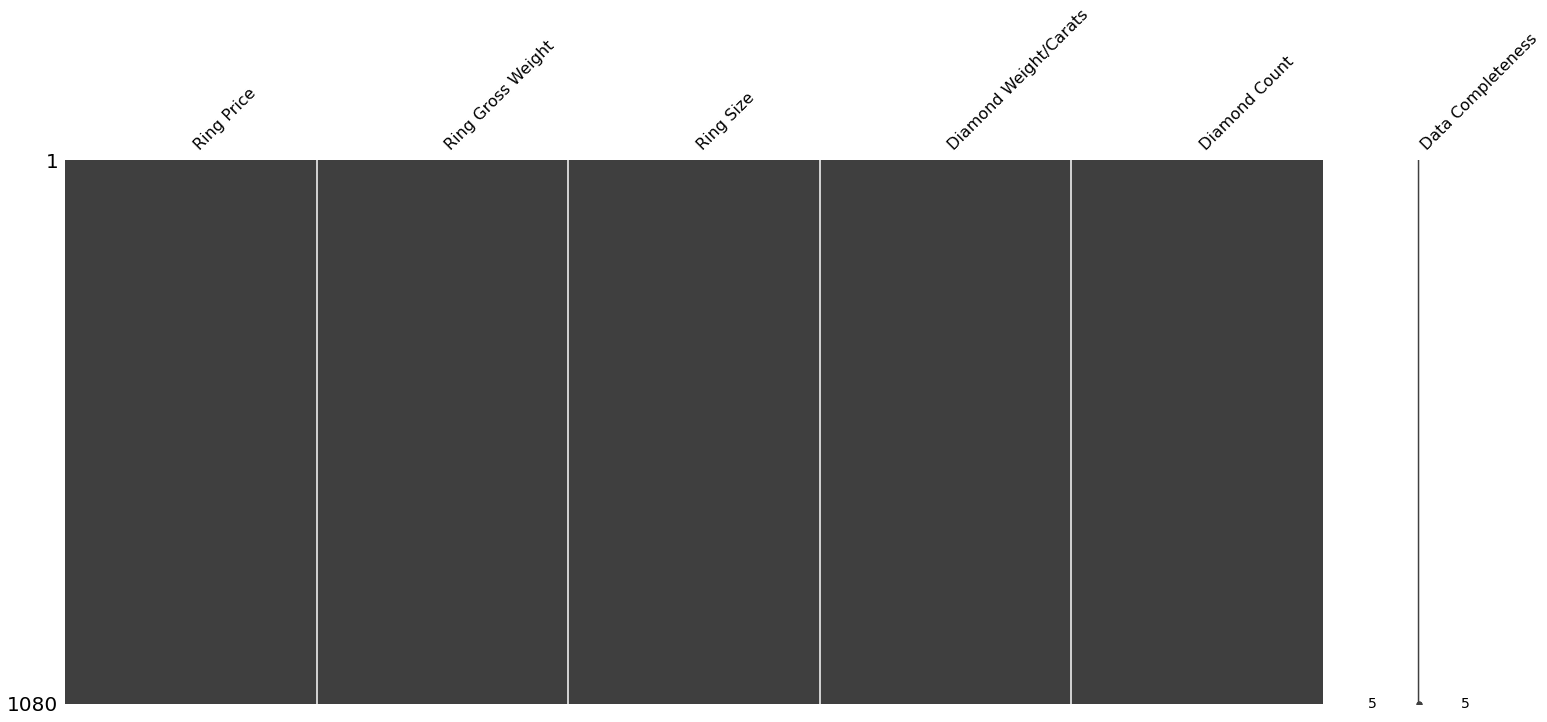

In [124]:
msno.matrix(df1, labels=True)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1444
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1080 non-null   int64  
 1   Ring Price             1080 non-null   float64
 2   Ring Gross Weight      1080 non-null   float64
 3   Ring Size              1080 non-null   float64
 4   Diamond Weight/Carats  1080 non-null   float64
 5   Diamond Count          1080 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 59.1 KB


In [7]:
df1.describe()

Unnamed: 0    Ring Price  Ring Gross Weight    Ring Size  \
count  1080.000000  1.080000e+03        1080.000000  1080.000000   
mean    707.769444  1.759433e+06          10.531759     6.182407   
std     414.007250  6.211596e+05           7.316465     1.423054   
min       0.000000  8.750000e+05           2.200000     3.000000   
25%     352.750000  1.375000e+06           6.100000     5.000000   
50%     705.500000  1.680250e+06           8.400000     6.000000   
75%    1068.250000  1.937500e+06          12.270000     7.000000   
max    1444.000000  4.000000e+06          59.900000    13.000000   

       Diamond Weight/Carats  Diamond Count  
count            1080.000000    1080.000000  
mean                6.506403      39.861111  
std                 7.837314      24.191834  
min                 0.190000      25.000000  
25%                 2.530000      25.000000  
50%                 3.795000      25.000000  
75%                 6.820000      50.000000  
max                90.000000     100.000000

In [72]:
df1.std()

Unnamed: 0                  414.007250
Ring Price               621159.605452
Ring Gross Weight             7.316465
Ring Size                     1.423054
Diamond Weight/Carats         7.837314
Diamond Count                24.191834
dtype: float64

In [8]:
# pd.set_option('display.max_rows', None)

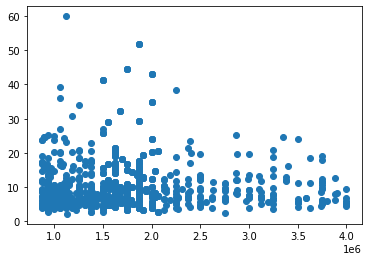

In [105]:
from matplotlib import pyplot as plt
x = df1['Ring Price']
y=df1['Ring Gross Weight']
plt.scatter(x,y)
plt.show()


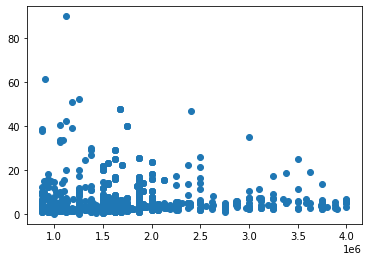

In [89]:
y=df1['Diamond Weight/Carats']
plt.scatter(x,y)
plt.show()


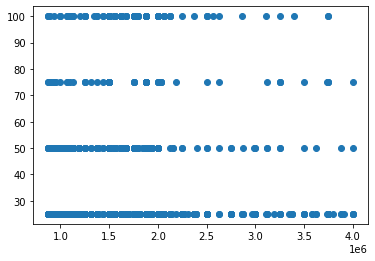

In [90]:
y = df1['Diamond Count']
plt.scatter(x,y)

In [91]:
y = df1['Ring Size']
plt.scatter(x,y)

In [98]:
import seaborn as sns
sns.boxplot(data=df1['Ring Price'])

<AxesSubplot:>

In [99]:
sns.boxplot(data=df1['Ring Size'])

<AxesSubplot:>

In [101]:
sns.boxplot(data=df1['Ring Gross Weight'])

<AxesSubplot:>

In [102]:
sns.boxplot(data=df1['Diamond Weight/Carats'])

<AxesSubplot:>

<AxesSubplot:>

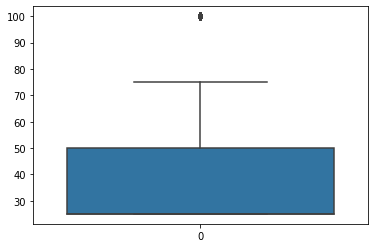

In [103]:
sns.boxplot(data=df1['Diamond Count'])

In [112]:
weight_value_count = df1['Ring Gross Weight'].value_counts()

In [126]:
plt.scatter(weight_value_count.index, weight_value_count)

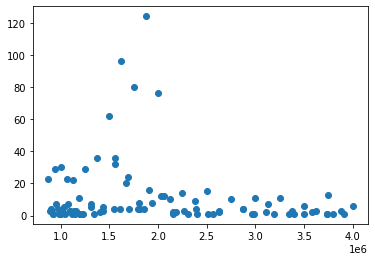

In [127]:
price_count_value=df1['Ring Price'].value_counts()
plt.scatter(price_count_value.index, price_count_value)

In [111]:
diamond_value_count = df1['Diamond Weight/Carats'].value_counts()

In [110]:
plt.scatter(diamond_value_count.index, diamond_value_count)

In [120]:
dimentions = (11,7.5)
fig, axis = plt.subplots(figsize=dimentions)
sns.heatmap(ax=axis, data=df1.corr(), annot=True)

<AxesSubplot:>

In [121]:
sns.displot(df1['Diamond Weight/Carats'])

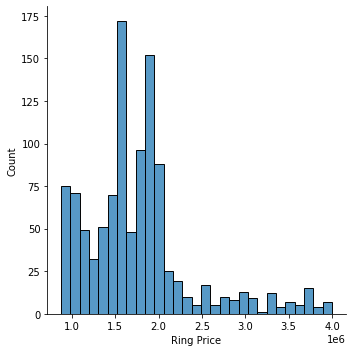

In [122]:
sns.displot(df1['Ring Price'])

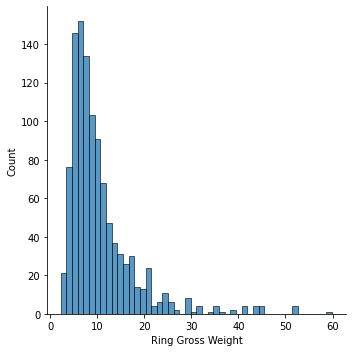

In [123]:
sns.displot(df1['Ring Gross Weight'])

In [125]:
X = df1.iloc[:, 1:]
y = df1.iloc[:, 0]
print(X.shape, y.shape)

(1080, 4) (1080,)


In [ ]:
import sklearn

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3)
X_train, y_train, X_validation, y_validation = train_test_split(X, y, test_size=0.3)

In [136]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
baseline_model = model.fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ring Price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8646
Date:                Sun, 07 Mar 2021   Prob (F-statistic):              0.485
Time:                        11:09:00   Log-Likelihood:                -15937.
No. Observations:                1080   AIC:                         3.188e+04
Df Residuals:                    1075   BIC:                         3.191e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.925e+06   9.16e+04     21.021      0.000    1.75e+06    2.11e+06
Ring Gross Weight      1034.1719   3421.690      0.302      0.763   -5679.776    7748.120
Ring Size             -2.432e+04   1.43e+04     -1.696      0.090   -5.25e+04    3817.778
Diamond Weight/Carats -1149.0343   2889.888     -0.398      0.691   -6819.496    4521.427
Diamond Count          -477.1630    822.607     -0.580      0.562   -2091.261    1136.935
==============================================================================
Omnibus:                      262.235   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.148
Skew:                           1.348   Prob(JB):                    9.48e-125
Kurtosis:                       5.330   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
X = X.drop(['Ring Gross Weight'], axis=1)

In [148]:
X=X.drop(['Diamond Weight/Carats'], axis=1)

In [149]:
X=X.drop(['Diamond Count'], axis=1)

In [150]:
model = sm.OLS(y,X)
baseline_model = model.fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ring Price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.001
Date:                Sun, 07 Mar 2021   Prob (F-statistic):             0.0835
Time:                        22:27:09   Log-Likelihood:                -15937.
No. Observations:                1080   AIC:                         3.188e+04
Df Residuals:                    1078   BIC:                         3.189e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.902e+06   8.42e+04     22.579      0.000    1.74e+06    2.07e+06
Ring Size    -2.3e+04   1.33e+04     -1.732      0.084    -4.9e+04    3052.117
==============================================================================
Omnibus:                      261.594   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.664
Skew:                           1.345   Prob(JB):                    3.28e-124
Kurtosis:                       5.323   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

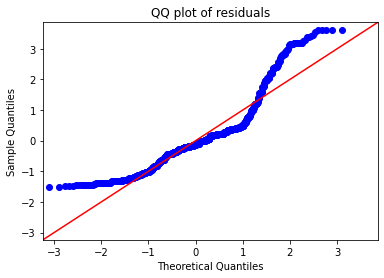

In [151]:
fig = sm.qqplot(baseline_model.resid, fit=True, line='45')
plt.title('QQ plot of residuals')
plt.show()